In [ ]:
# Hierarchical Clustring
# Importing libraries
import pandas as pd
import numpy as np
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

Import the dataset and slice the important features

### Load and Prepare Data

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv') #import dataset
x = df.iloc[:,[3,4]].values # Select Age and Spending Score (1-100)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x.shape

(200, 2)

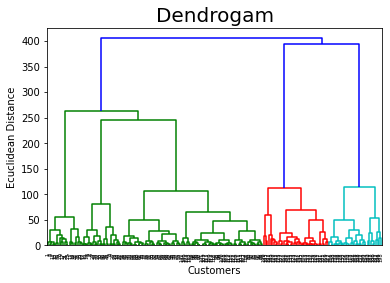

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

### Train the Model (Clustering)

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
X = x
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init =  'k-means++', random_state = 42) #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

“init” argument is the method for initializing the centroid. We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)


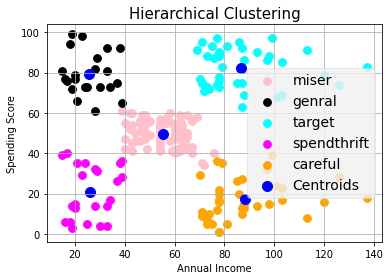

In [ ]:
# Visualising the clusters
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'pink', label = 'miser')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'black', label = 'genral')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'cyan', label = 'target') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'magenta', label = 'spendthrift')
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'orange', label = 'careful')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')

plt.style.use('fivethirtyeight')
plt.title('Hierarchical Clustering', fontsize=15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.legend()


As you can see there are 5 clusters in total which are visualized in different colors and the centroid of each cluster is visualized in blue color.